### Ejercicio 3: Validación y rediseño.

Una vez realizados los cálculos analíticos del **Ejercicio 1** (Planta de 1er orden + PI), procederemos a validar los resultados mediante simulación.

Asumiremos que los cálculos teóricos para $\zeta=0.707$ y $\omega_n=5$ rad/s arrojaron los siguientes valores:
* $K_p = 0.507$
* $K_i = 2.5$

**Instrucciones:**

1.  **Ejecute la celda de código inferior:** Esta celda contiene la definición del sistema con los valores teóricos calculados, genera la gráfica de respuesta al escalón y muestra las métricas de desempeño.
2.  **Analice los resultados:** Observe las métricas impresas. ¿Se cumple el sobreimpulso máximo del 5% que prometía la teoría?

--- Función de transferencia de lazo cerrado (Teórico). ---
<TransferFunction>: sys[508]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     5.07 s + 25
  -----------------
  s^2 + 7.07 s + 25


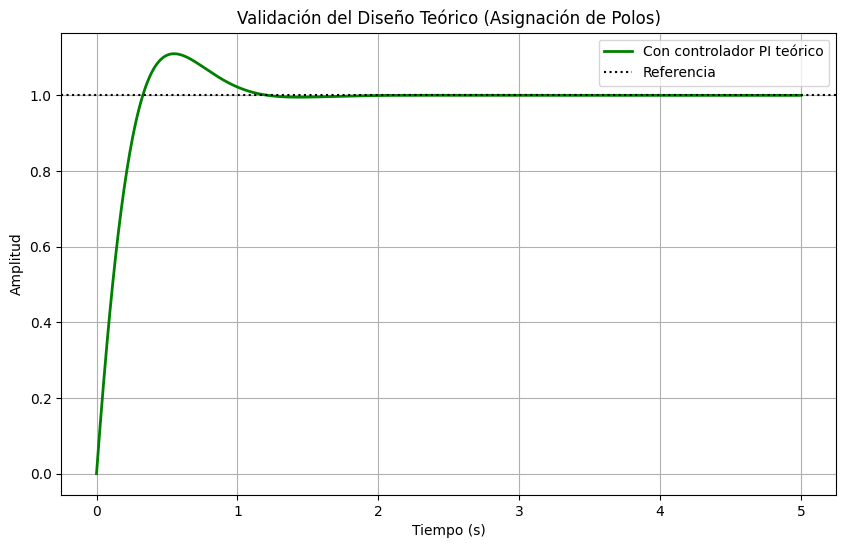

--- Análisis de Polos y Ceros. ---
Polos del sistema controlado: [-3.535+3.53606773j -3.535-3.53606773j]
Ceros del sistema controlado: [-4.93096647+0.j]


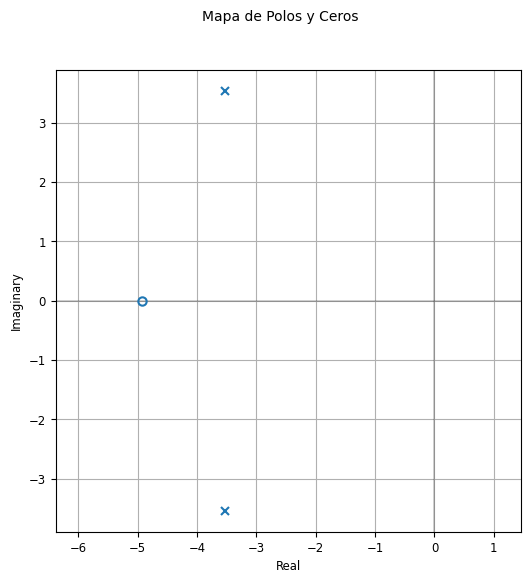


--- Métricas de desempeño del sistema (PI Teórico). ---
- Métricas teóricas esperadas para zeta=0.707 y wn=5 rad/s:
           - Mp ≈ 4.3%
           - Ts ≈ 1.13 s.

- Métricas reales de la simulación:
Sobreimpulso (Overshoot):       11.01 %
Tiempo de Establecimiento (2%): 1.0264 s
Valor Final:                    1.0000


In [66]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definición del sistema y controlador. ---
# Planta Gp(s) = 10 / (s+2).
num_p = [10]
den_p = [1, 2]
Gp = ct.tf(num_p, den_p)

# Controlador PI Teórico: Gc = (Kps + Ki)/s.
Kp_teo = 0.507
Ki_teo = 2.5
Gc = ct.tf([Kp_teo, Ki_teo], [1, 0])

# Sistema en lazo cerrado con el controlador: G_LC = (Gc*Gp) / (1 + Gc*Gp).
G_LC = ct.feedback(Gc * Gp, 1)
print("--- Función de transferencia de lazo cerrado (Teórico). ---")
print(G_LC)


# --- 2. Simulación y gráfica de las respuestas. ---
# Vector de tiempo: 0 a 5 segundos.
t = np.linspace(0, 5, 1000)

# Obtener respuesta al escalón.
_, y_LC = ct.step_response(G_LC, T=t)

plt.figure(figsize=(10, 6))
plt.plot(t, y_LC, 'g-', linewidth=2,  label='Con controlador PI teórico')
plt.axhline(y=1, color='k', linestyle=':', label='Referencia')

plt.title('Validación del Diseño Teórico (Asignación de Polos)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


# --- 3. Mapa de Polos y Ceros ---
print("--- Análisis de Polos y Ceros. ---")
polos = ct.poles(G_LC)
ceros = ct.zeros(G_LC)
print(f"Polos del sistema controlado: {polos}")
print(f"Ceros del sistema controlado: {ceros}")

plt.figure(figsize=(6, 6))
ct.pzmap(G_LC, title='Mapa de Polos y Ceros')
plt.grid(True)
plt.show()


# --- 4. Métricas de desempeño. ---
info = ct.step_info(G_LC)
print("\n--- Métricas de desempeño del sistema (PI Teórico). ---")
print("""- Métricas teóricas esperadas para zeta=0.707 y wn=5 rad/s:
           - Mp ≈ 4.3%
           - Ts ≈ 1.13 s.""")

print(f"\n- Métricas reales de la simulación:")
print(f"Sobreimpulso (Overshoot):       {info['Overshoot']:.2f} %")
print(f"Tiempo de Establecimiento (2%): {info['SettlingTime']:.4f} s")
print(f"Valor Final:                    {y_LC[-1]:.4f}")

#### Realice lo siguiente.

Al ejecutar la simulación anterior, notará que el sobreimpulso real es mayor al 4.3% esperado teóricamente.
Esto se debe a la presencia del cero ($s = -K_i/K_p$) introducido por el controlador PI, el cual no fue considerado en las fórmulas estándar de segundo orden usadas para el cálculo.

**Actividad a realizar:**
Rediseñe las ganancias del controlador ($K_p$ y/o $K_i$) para lograr que el sobreimpulso sea **menor o igual al 5%**.

1.  **Rediseño:** Puede proponer un nuevo $\zeta$ (mayor a 0.707) y recalcular, o utilizar el método de LGR para ajustar la ganancia. *Nota: Para este rediseño, puede ser flexible con el requisito del tiempo de establecimiento.* 
2.  **Justificación:** En una nueva celda de Markdown (incluyendo sus cálculos en fotografía, como cólidgo o como celda de Markdown/Python), justifique brevemente su elección mostrando el nuevo cálculo. **(2.5 puntos)**
3.  **Comparación:** Agregue una celda de código final donde grafique en la misma figura: **(1.0 puntos)**
    * La respuesta con el PI Teórico (Original).
    * La respuesta con el PI Rediseñado (Modificado).
    * Imprima las nuevas métricas para verificar el cumplimiento.

### Analizaremos la función de lazo abierto: 
$$G_{LA}(s) = G_c(s)G_p(s)$$
El LGR nos mostrará cómo se mueven los polos a medida que variamos la ganancia total del sistema. Nuestro diseño específico corresponde al punto donde la ganancia $K=1$.

In [67]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definición de la Planta y el Controlador. ---
num_p = [10]
den_p = [1, 2]
Gp = ct.tf(num_p, den_p)

# Controlador: Gc(s) = 0.507s + 2.5.
# Nota: Esto introduce un CERO en s = -Kp/Kd = -3.2/0.6 = -5.33.
Kp_teo = 0.507
Ki_teo = 2.5
Gc = ct.tf([Kp_teo, Ki_teo], [1, 0])


# --- 2. Función de Transferencia de Lazo Abierto (G_LA). ---
# El LGR se dibuja a partir de la función de lazo abierto.
G_LA = Gc * Gp

print("Función de Lazo Abierto G_LA(s):")
print(G_LA)

# Calculamos el cero y los polos de lazo abierto para referencia.
ceros_la_2 = ct.zeros(G_LA)
polos_la_2 = ct.poles(G_LA)
print(f"\nCeros de Lazo Abierto (Círculos 'o'): {ceros_la_2}")
print(f"Polos de Lazo Abierto (Cruces 'x'): {polos_la_2}")

Función de Lazo Abierto G_LA(s):
<TransferFunction>: sys[514]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  5.07 s + 25
  -----------
   s^2 + 2 s

Ceros de Lazo Abierto (Círculos 'o'): [-4.93096647+0.j]
Polos de Lazo Abierto (Cruces 'x'): [-2.+0.j  0.+0.j]


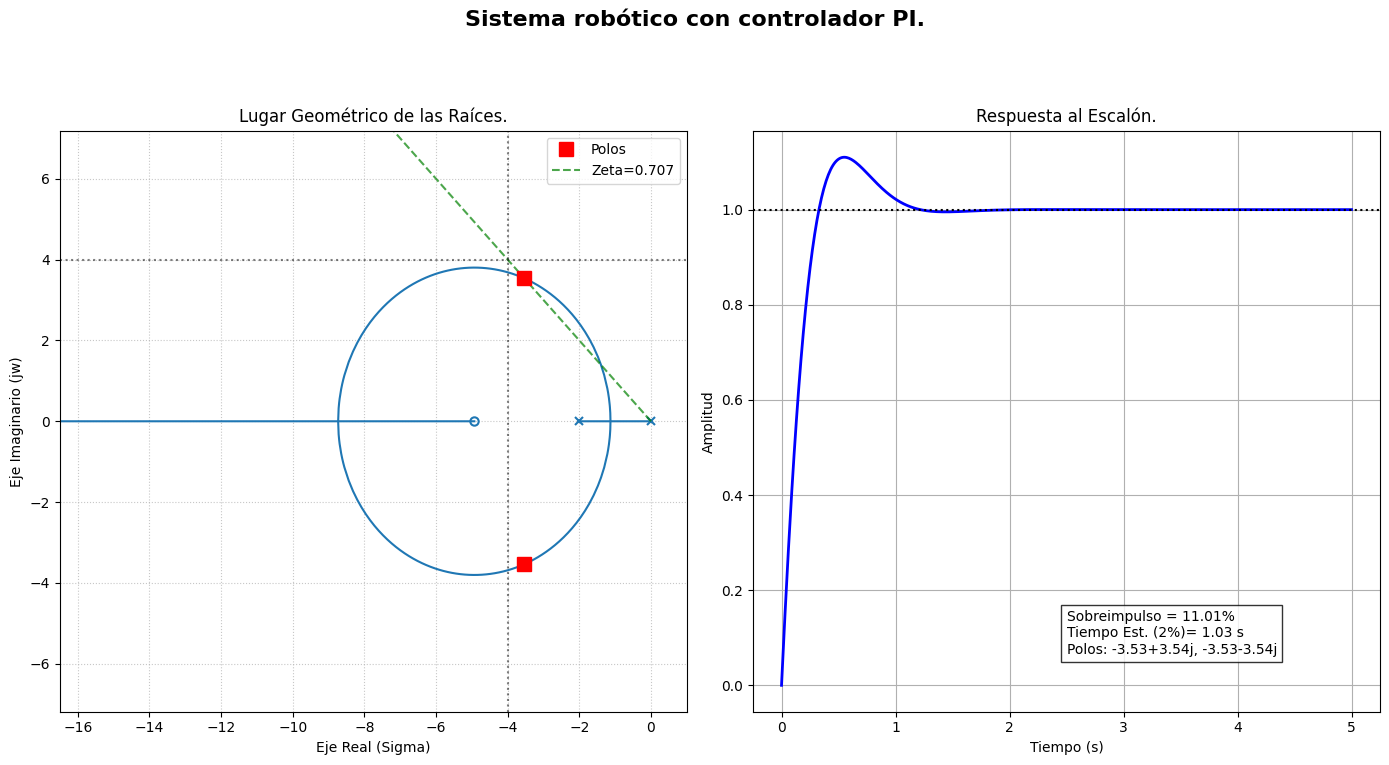

In [68]:
# --- 3. Gráfica del Lugar Geométrico de las Raíces y de la Respuesta en el tiempo. ---
# Tamaño de la figura (de lado izquiero el LGR y del lado derecho la respuesta del tiempo).
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))


# --- GRÁFICA 1: LUGAR GEOMÉTRICO (Izquierda) ---
# a. Se obtiene el mapa del lugar de las raíces.
rl_data = ct.root_locus_map(G_LA)
rl_data.plot(ax=ax1)
ax1.legend(loc='upper right')
ax1.grid(True, linestyle=':', alpha=0.7)

# b. Se calcula el sistema en lazo cerrado y se determinan los polos.
G_LC = ct.feedback(G_LA, 1)
polos = ct.poles(G_LC)
    
# c. Se dibujan los polos (cuadros rojos).
h_polos, = ax1.plot(np.real(polos), np.imag(polos), 'rs', markersize=10, label=f'Polos', zorder=10)
    
# d. Se incluye una referencia de diseño (Zeta=0.707).
h_zeta, = ax1.plot([0, -10], [0, 10], 'g--', alpha=0.7, label='Zeta=0.707')

# e. Se muestran líneas punteadas para marcar la ubicación -4 + j4.
ax1.axvline(x=-4, color='k', linestyle=':', alpha=0.5)
ax1.axhline(y=4, color='k', linestyle=':', alpha=0.5)

# f. Se muestran los títulos y las líneas de referencia de los ejes.
ax1.set_title('Lugar Geométrico de las Raíces.')
ax1.set_xlabel('Eje Real (Sigma)')
ax1.set_ylabel('Eje Imaginario (jw)')
ax1.legend(handles=[h_polos, h_zeta], loc='upper right')


# --- GRÁFICA 2: RESPUESTA AL ESCALÓN (Derecha). ---
# a. Se crea el vector de tiempo y se obtiene la respuesta en el dominio del tiempo.
t = np.linspace(0, 5, 500)
t, y = ct.step_response(G_LC, T=t)

# b. Se grafica la respuesta y se incluye el valor de referencia.    
ax2.plot(t, y, 'b-', linewidth=2)
ax2.axhline(1, color='k', linestyle=':')
ax2.set_title(f'Respuesta al Escalón.')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Amplitud')
ax2.grid(True)
    
# c. Se obtienen los datos de la respuesta.
info = ct.step_info(G_LC)
texto_info = (f"Sobreimpulso = {info['Overshoot']:.2f}%\n"
                  f"Tiempo Est. (2%)= {info['SettlingTime']:.2f} s\n"
                  f"Polos: {polos[0]:.2f}, {polos[1]:.2f}")
    
# d. Se coloca la información dentro de la gráfica.
ax2.text(0.5, 0.1, texto_info, transform=ax2.transAxes, 
             bbox=dict(facecolor='white', alpha=0.8))


# --- Se muetran ambas gráficas. ---
fig.suptitle('Sistema robótico con controlador PI.', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()

#### Interpretación de los resultados.


 **La causa del sobreimpulso (conexión entre gráficas):**
    Al mirar la **gráfica de la derecha (tiempo)**, vemos un sobreimpulso del **11.01%**, a pesar de que diseñamos teóricamente para un 5%.
    * **¿Por qué?** Si observa de nuevo el LGR, verá el **cero** del controlador en $-5.33$ (círculo 'o').
    * Aunque los polos (cuadros rojos) están en la posición correcta para $\zeta=0.707$, la cercanía de este cero a los polos dominantes añade un efecto de "anticipación" o derivada pura.
    * Esto inyecta energía extra al inicio de la respuesta, causando que el sistema "salte" más alto de lo que predecía la teoría de segundo orden puro.

Como resultado, el LGR nos permitio ver claramente qué tan cerca está ese cero de nuestros polos dominantes.

---

#### Visualización dinámica del LGR.

Hasta este punto, hemos analizado el sistema con un diseño fijo. Sin embargo, el verdadero poder del Lugar Geométrico de las Raíces radica en entender cómo evoluciona el sistema al variar sus parámetros.

A continuación, se usa una herramienta interactiva que conecta el LGR y la respuesta en el tiempo.

Al mover el deslizador de la **Ganancia $K$**, podrá ajustar en tiempo real y de esta manera se aproximara el sobreimpulso:

In [69]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

# --- 1. Definición de la Planta y el Controlador. ---

num_p = [10]
den_p = [1, 2]
Gp = ct.tf(num_p, den_p)

# Controlador: Gc(s) = 0.507s + 2.5.
# Nota: Esto introduce un CERO en s = -Kp/Kd = -3.2/0.6 = -5.33.
Kp_teo = 0.507
Ki_teo = 2.5
Gc = ct.tf([Kp_teo, Ki_teo], [1, 0])

# --- 2. Función de Transferencia de Lazo Abierto (G_LA). ---
# El LGR se dibuja a partir de la función de lazo abierto.
G_LA = Gc * Gp


# --- 3. Función de actualización interactiva. ---
def plot_interactivo(K=1.0):
    """
    Esta función se ejecuta cada vez que mueves el slider.
    :param K: Ganancia adicional del sistema.
    """
    
    # a. Se calcula el sistema en lazo cerrado dinámico (depende de K).
    # G_LC = (K * G_LA) / (1 + K * G_LA)
    G_LC = ct.feedback(K * G_LA, 1)
    
    # b. Se determinan los polos actuales.
    polos = ct.poles(G_LC)

    # --- Configuración de la figura ---
    # Tamaño de la figura (de lado izquierdo el LGR y del lado derecho la respuesta del tiempo).
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))


    # --- GRÁFICA 1: LUGAR GEOMÉTRICO (Izquierda) ---
    # a. Se obtiene el mapa del lugar de las raíces (basado en G_LA fijo).
    rl_data = ct.root_locus_map(G_LA)
    rl_data.plot(ax=ax1)
    ax1.grid(True, linestyle=':', alpha=0.7)
    
    # b. Se dibujan los polos actuales (cuadros rojos dinámicos).
    h_polos, = ax1.plot(np.real(polos), np.imag(polos), 'rs', markersize=10, label=f'Polos (K={K:.2f})', zorder=10)
        
    # c. Se incluye una referencia de diseño (Zeta=0.707).
    h_zeta, = ax1.plot([0, -10], [0, 10], 'g--', alpha=0.7, label='Zeta=0.707')

    # d. Se muestran los títulos y las líneas de referencia de los ejes.
    ax1.set_title('Lugar Geométrico de las Raíces.')
    ax1.set_xlabel('Eje Real (Sigma)')
    ax1.set_ylabel('Eje Imaginario (jw)')
    ax1.legend(handles=[h_polos, h_zeta], loc='upper right')


    # --- GRÁFICA 2: RESPUESTA AL ESCALÓN (Derecha). ---
    # a. Se crea el vector de tiempo y se obtiene la respuesta en el dominio del tiempo.
    t = np.linspace(0, 5, 500)
    t, y = ct.step_response(G_LC, T=t)

    # b. Se grafica la respuesta y se incluye el valor de referencia.    
    ax2.plot(t, y, 'b-', linewidth=2)
    ax2.axhline(1, color='k', linestyle=':')
    ax2.set_title(f'Respuesta al Escalón.')
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_ylabel('Amplitud')
    ax2.grid(True)
        
    # c. Se obtienen los datos de la respuesta.
    info = ct.step_info(G_LC)
    texto_info = (f"Sobreimpulso = {info['Overshoot']:.2f}%\n"
                  f"Tiempo Est. (2%)= {info['SettlingTime']:.2f} s\n"
                  f"Polos: {polos[0]:.2f}, {polos[1]:.2f}")
        
    # d. Se coloca la información dentro de la gráfica.
    ax2.text(0.5, 0.1, texto_info, transform=ax2.transAxes, 
             bbox=dict(facecolor='white', alpha=0.8))


    # --- Se muestran ambas gráficas. ---
    fig.suptitle(f'Sistema robótico con controlador PI (Ganancia K={K:.1f})', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.92])
    plt.show()
    plt.close(fig)

# --- 4. Crear el slider. ---

interact(plot_interactivo, 
         K=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.05, 
                       description='Ganancia K:', continuous_update=False));

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Ganancia K:', max=10.0, min…

#### Conclusión del análisis interactivo: visualización dinámica del LGR.

Como podemos observar el analisis iterativo manual de este metodo resulto completamente eficiente al facilit
ar los calculos ademas de observar que la **Ganancia $K$** resulto siendo K=0.15 teiendo un 
sobre impulso maximo de 4.59%.

**En conclusion ahora se tiene una herramienta mas para poder ajustar la respuesta de un sistema sin 
mayores complicaciones.**
**Se añade la grafica comparativa para resaltar los efectos del escalon**

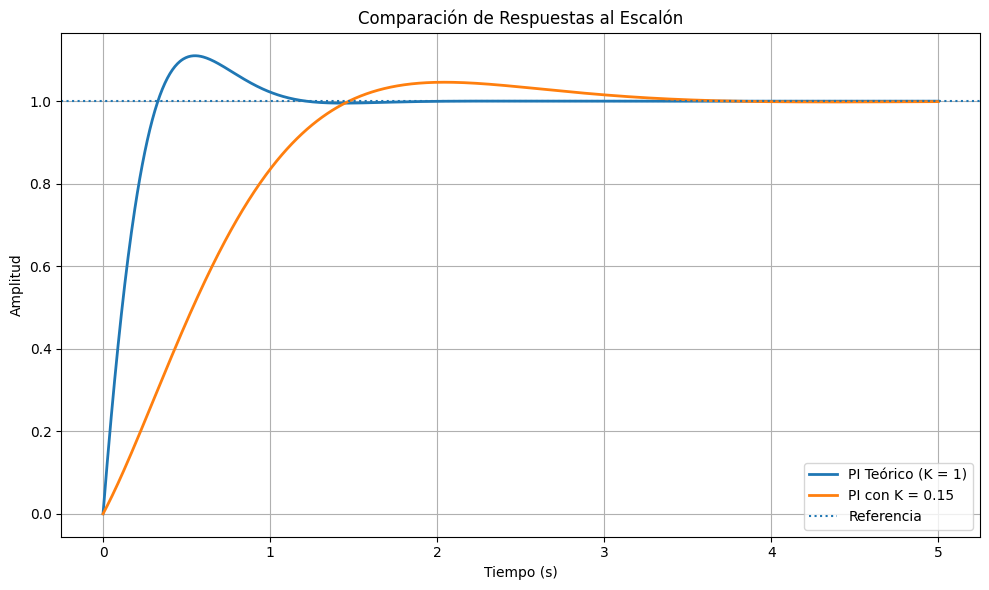


=== MÉTRICAS PI TEÓRICO ===
Sobreimpulso: 11.01 %
Tiempo de establecimiento (2%): 1.0264 s

=== MÉTRICAS PI CON K = 0.15 ===
Sobreimpulso: 4.59 %
Tiempo de establecimiento (2%): 2.8815 s


In [70]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definición de la Planta ---
num_p = [10]
den_p = [1, 2]
Gp = ct.tf(num_p, den_p)

# --- 2. Controlador PI Teórico ---
Kp_teo = 0.507
Ki_teo = 2.5
Gc = ct.tf([Kp_teo, Ki_teo], [1, 0])

# --- 3. Sistema con PI Teórico (SIN K adicional) ---
G_LC_teo = ct.feedback(Gc * Gp, 1)

# --- 4. Sistema con K = 0.15 ---
K = 0.15
G_LC_K = ct.feedback(K * Gc * Gp, 1)

# --- 5. Vector de tiempo ---
t = np.linspace(0, 5, 1000)

# --- 6. Respuestas al escalón ---
_, y_teo = ct.step_response(G_LC_teo, T=t)
_, y_K = ct.step_response(G_LC_K, T=t)

# --- 7. GRÁFICA COMBINADA ---
plt.figure(figsize=(10, 6))

plt.plot(t, y_teo, linewidth=2, label='PI Teórico (K = 1)')
plt.plot(t, y_K,  linewidth=2, label='PI con K = 0.15')

plt.axhline(1, linestyle=':', label='Referencia')
plt.grid(True)
plt.title('Comparación de Respuestas al Escalón')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.tight_layout()
plt.show()

# --- 8. MÉTRICAS DE AMBOS SISTEMAS ---
info_teo = ct.step_info(G_LC_teo)
info_K   = ct.step_info(G_LC_K)

print("\n=== MÉTRICAS PI TEÓRICO ===")
print(f"Sobreimpulso: {info_teo['Overshoot']:.2f} %")
print(f"Tiempo de establecimiento (2%): {info_teo['SettlingTime']:.4f} s")

print("\n=== MÉTRICAS PI CON K = 0.15 ===")
print(f"Sobreimpulso: {info_K['Overshoot']:.2f} %")
print(f"Tiempo de establecimiento (2%): {info_K['SettlingTime']:.4f} s")
